<a href="https://colab.research.google.com/github/hugosdef/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Pr4Grupo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.ufv.es/wp-content/uploads/2023/03/logo-UFV-scaled.jpg" alt="Logo de Colab" width="200">


# **Práctica 4**
## **Grupo 5**
###**Autores:**
- Hugo Santos de Felipe
- David Marín Sala
- Álvaro García Hernández


In [1]:
!pip install scoop
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install deap

In [2]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from deap import base, creator, tools, algorithms
from matplotlib import cm

##**EJERCICIO 1**
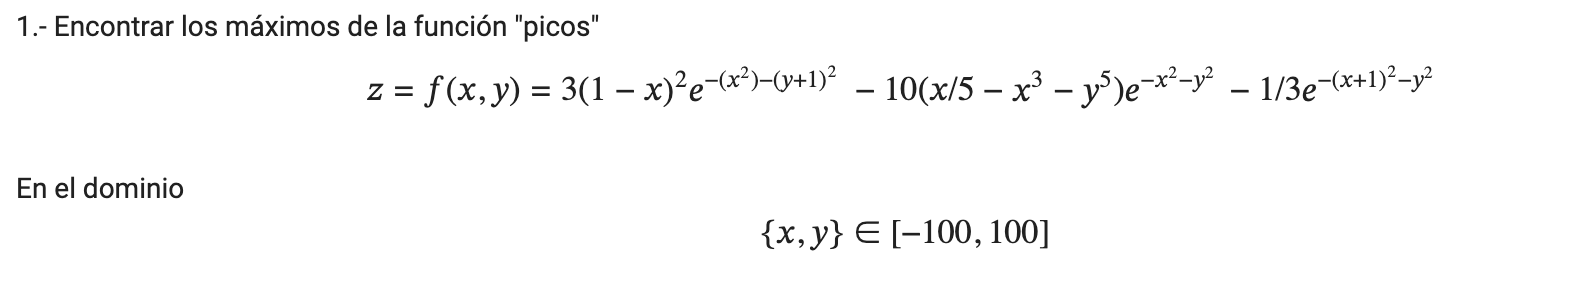

**Definimos la función objetivo.**

Text(0.5, 0, 'Z axis')

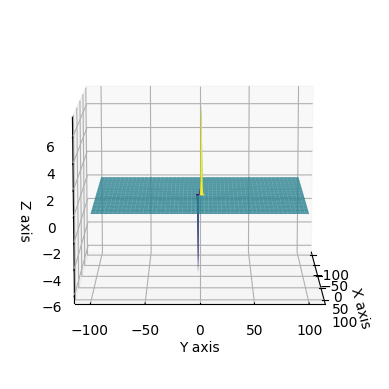

In [3]:
def funcion_objetivo(x, y):
    """
    Definición de la función objetivo.
    """
    return 3 * ((1 - x)**2) * np.exp(-(x**2) - (y + 1)**2) - \
           10 * (x/5 - x**3 - y**5) * np.exp(-x**2 - y**2) - \
           (1/3) * np.exp(-(x + 1)**2 - y**2)

# Creación de una malla de puntos para graficar
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
x, y = np.meshgrid(x, y)
z = funcion_objetivo(x, y)

# Creación de la gráfica 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=10,azim=0)
# Etiquetas y título
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

Al analizar la función objetivo, apreciamos que los puntos de interés, como **máximos y mínimos**, se concentran en el intervalo de **-5 **a **5** para las variables x e y. Por lo tanto, es práctico enfocar el análisis en este rango más reducido para una evaluación más eficiente y precisa de la función, mejorando la visualización y comprensión de los aspectos críticos relevantes.





Text(0.5, 0, 'Z axis')

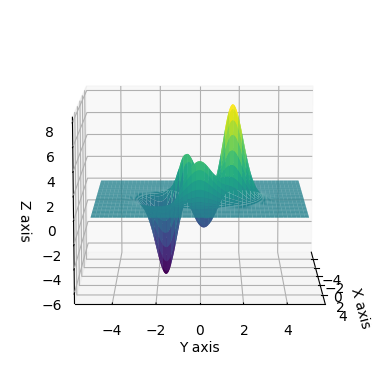

In [4]:
def funcion_objetivo(x, y):
    """
    Definición de la función objetivo.
    """
    return 3 * ((1 - x)**2) * np.exp(-(x**2) - (y + 1)**2) - \
           10 * (x/5 - x**3 - y**5) * np.exp(-x**2 - y**2) - \
           (1/3) * np.exp(-(x + 1)**2 - y**2)

# Creación de una malla de puntos para graficar
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)
z = funcion_objetivo(x, y)

# Creación de la gráfica 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=10,azim=0)
# Etiquetas y título
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

En este gráfico podemos apreciar con facilidad los máximos y mínimos locales y además podemos visualizar los máximos y mínimos absolutos.

##**MEJOR ALGORITMO PARA CRUCE DE UN PUNTO**

**Parámetros Esenciales en Algoritmos Genéticos:**

**CXPB (Probability of Crossover) - 0.5:** Este parámetro determina la probabilidad de que dos individuos en la población se crucen para producir descendencia. Un valor elevado de CXPB acelera la convergencia del algoritmo, ya que promueve la reproducción a través del cruce. Por el contrario, un valor bajo favorece la variabilidad genética a través de mutaciones, en lugar de la reproducción.

**MUTPB (Probability of Mutation) - 0.6:** Representa la probabilidad de que ocurra una mutación en los individuos. Un valor alto en MUTPB significa que las mutaciones son más frecuentes durante la reproducción, lo que puede aumentar la diversidad genética dentro de la población y evitar la convergencia prematura hacia soluciones subóptimas. Un valor bajo, por otro lado, reduce la frecuencia de mutaciones, estabilizando la población.

**NGEN (Number of Generations) - 18:** Indica el número total de generaciones que se ejecutarán en el algoritmo. Un número mayor de generaciones permite una evolución más prolongada del sistema, lo que potencialmente conduce a soluciones más precisas y óptimas, dado que el algoritmo tiene más oportunidades para refinar las soluciones a través de sucesivas generaciones.

**Métodos de Selección Utilizados:**

**- Sel Best:** Este método selecciona los individuos más aptos de la población actual para ser padres en la próxima generación. Es ventajoso por su rápida convergencia hacia soluciones de alta calidad, aunque puede correr el riesgo de caer en óptimos locales si no se combina con suficiente variabilidad genética.

**- Sel Tournament:** En este enfoque, se seleccionan al azar varios individuos, y el de mayor aptitud es elegido como padre para la siguiente generación. Aunque es más operacionalmente intensivo que el método "Sel Best" debido a la necesidad de múltiples comparaciones, este método puede ofrecer una mayor diversidad y precisión, evitando así la convergencia prematura.

gen	nevals	avg     	std    	min       	max    
0  	12    	0.216819	0.74208	-0.0861001	2.67593
1  	10    	0.00524512	0.277343	-0.597996 	0.747567
2  	10    	0.64715   	1.43132 	0.00361247	4.67568 
3  	12    	0.416174  	1.069   	-0.42366  	2.77214 
4  	12    	1.1056    	2.39237 	-2.78487  	7.52403 
5  	8     	3.1672    	2.09119 	0.420113  	7.52403 
6  	8     	4.65274   	1.63043 	2.77214   	7.52403 
7  	9     	5.04734   	1.83887 	0.509499  	7.52403 
8  	8     	4.4001    	2.37966 	0.308116  	7.52403 
9  	9     	5.74049   	1.618   	1.73391   	7.52403 
10 	11    	6.52871   	1.61733 	2.09751   	7.56013 
11 	7     	6.0053    	2.54831 	0.0775767 	7.70829 
12 	10    	5.90457   	2.24593 	1.46887   	7.76823 
13 	9     	6.92394   	1.92169 	0.907527  	8.00699 
14 	9     	7.29174   	1.56317 	2.16393   	8.0557  
15 	8     	7.43865   	1.55414 	2.3077    	8.0557  
16 	9     	5.52882   	2.45205 	1.18042   	8.0557  
17 	10    	6.30099   	1.76073 	3.13543   	8.0557  
18 	12    	5.42948   	2.75524 	0.150729

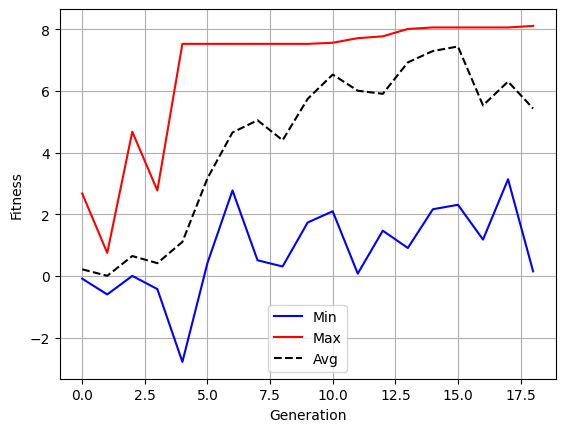

In [5]:

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax1", base.Fitness, weights=(1.0,))
creator.create("Individual1", list, fitness=creator.FitnessMax1)

def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 5 or x[i] < -5:
            return -1,

    res = 3 * ((1 - x[0])**2) * np.exp(-(x[0]**2) - (x[1] + 1)**2) - 10 * (x[0]/5 - x[0]**3 - x[1]**5) * np.exp(-x[0]**2 - x[1]**2) - (1/3) * np.exp(-(x[0] + 1)**2 - x[1]**2)

    return res,


def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    #ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main():
    toolbox = base.Toolbox()

    # Generación de genes
    toolbox.register("attr_uniform", random.uniform, -5, 5)

    # Generación de inviduos y población
    toolbox.register("individual", tools.initRepeat, creator.Individual1,
                 toolbox.attr_uniform, 2)
    toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 12)

    # Registro de operaciones genéticas
    toolbox.register("evaluate", funcion_objetivo)
    toolbox.register("mate", tools.cxOnePoint)
    toolbox.register("mutate", tools.mutGaussian, mu=0.5,
                 sigma= 0.5, indpb=0.35)#Antes era 0.25
    toolbox.register("select", tools.selTournament, tournsize=3)
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.6, 18
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)



**La línea roja** muestra que, tras unas fluctuaciones iniciales, se logra una mejora significativa en la calidad de la mejor solución hasta aproximadamente la séptima generación. A partir de ahí, la aptitud máxima se estabiliza con ligeras variaciones, indicando que el algoritmo ha encontrado soluciones robustas. Este comportamiento sugiere que las operaciones de selección y los operadores genéticos (cruce y mutación) están efectivamente preservando y mejorando las características deseables en la población. En la generación 12.5 el algoritmo alcanza su valor más alto.

**La línea negra** discontinua representa la aptitud promedio de la población, lo cual es un indicador del rendimiento general del algoritmo genético. Un aumento en la aptitud promedio a lo largo de las generaciones indica que no solo las mejores soluciones están mejorando, sino que la población en su conjunto está evolucionando hacia soluciones de mayor calidad, además su convergencia hacia 8 nos indica que está convergiendo de manera adecuada.



##**CRUCE DE DOS PUNTOS CON PARÁMETROS DE CRUCE UN PUNTO**

Probamos ahora el anterior algoritmo con cruce de dos puntos.

gen	nevals	avg     	std    	min       	max    
0  	12    	0.216819	0.74208	-0.0861001	2.67593
1  	8     	-0.115818	0.311874	-0.96593  	0.164145
2  	10    	-0.154329	1.16698 	-3.47121  	2.05036 
3  	11    	-0.0235115	0.223797	-0.682671 	0.23465 
4  	10    	-0.0577522	0.398298	-1.35166  	0.23465 
5  	10    	-0.126687 	0.482476	-1.38469  	0.257935
6  	10    	-0.155031 	0.679687	-2.19558  	0.257935
7  	11    	0.189193  	0.158538	-0.000112881	0.572821
8  	9     	-0.0391621	1.17986 	-3.91042    	0.581639
9  	11    	0.0114889 	1.60147 	-3.12654    	3.53955 
10 	9     	0.432639  	1.83095 	-3.76364    	3.53955 
11 	11    	0.667146  	1.90929 	-2.4211     	3.53955 
12 	8     	1.07242   	1.76244 	-2.12728    	3.61194 
13 	10    	2.56924   	1.44902 	-0.768917   	3.61194 
14 	6     	3.06769   	1.12724 	0.39656     	3.61194 
15 	9     	3.19621   	0.743695	1.55669     	3.70731 
16 	11    	2.83997   	1.28159 	0.0367844   	3.70731 
17 	10    	2.7171    	1.28993 	0.398926    	3.70949 
18 	10    	2.88494 

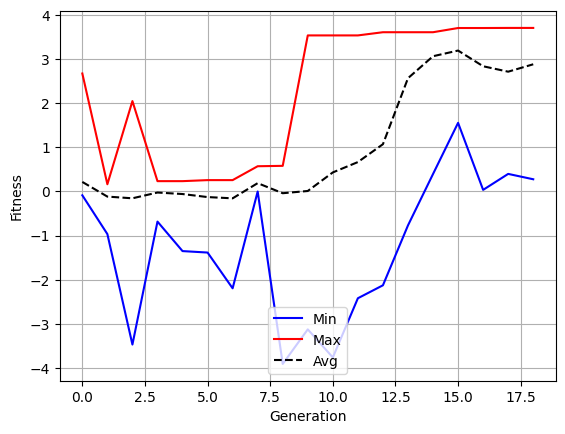

In [6]:
# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax5", base.Fitness, weights=(1.0,))
creator.create("Individual5", list, fitness=creator.FitnessMax5)

def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 5 or x[i] < -5:
            return -1,

    res = 3 * ((1 - x[0])**2) * np.exp(-(x[0]**2) - (x[1] + 1)**2) - 10 * (x[0]/5 - x[0]**3 - x[1]**5) * np.exp(-x[0]**2 - x[1]**2) - (1/3) * np.exp(-(x[0] + 1)**2 - x[1]**2)

    return res,


def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    #ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main45():
    toolbox = base.Toolbox()

    # Generación de genes
    toolbox.register("attr_uniform", random.uniform, -5, 5)

    # Generación de inviduos y población
    toolbox.register("individual", tools.initRepeat, creator.Individual5,
                 toolbox.attr_uniform, 2)
    toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 12)

    # Registro de operaciones genéticas
    toolbox.register("evaluate", funcion_objetivo)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutGaussian, mu=0.5,
                 sigma= 0.5, indpb=0.35)#Antes era 0.25
    toolbox.register("select", tools.selTournament, tournsize=3)
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.6, 18
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

best, log = main45()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)


**La línea roja en la gráfica**, que representa la máxima aptitud observada por generación, evidencia que el algoritmo genético logró identificar rápidamente una solución prometedora. Sin embargo, tras esta mejora inicial, la progresión en la aptitud máxima se estabiliza, lo cual nos confirma que el algoritmo se ha asentado en un óptimo local. Este estancamiento en las generaciones posteriores a la séptima indica una ausencia de avance hacia soluciones de mayor calidad.

El uso de cruce de dos puntos, en teoría, debería fomentar una diversificación genética significativa dentro de la población. No obstante, la efectividad de este operador depende críticamente de su combinación con una estrategia de mutación complementaria y un esquema de selección equilibrado. Sin estos componentes, existe un riesgo elevado de convergencia prematura.

Aunque el cruce de dos puntos puede generar variabilidad, esta por sí sola no garantiza la capacidad del algoritmo para superar los óptimos locales y continuar la exploración del espacio de búsqueda hacia soluciones óptimas globales.

##**COMPARACIÓN ALGORITMOS CRUCE UN PUNTO CRUCE DOS PUNTOS CON LOS MISMOS PARÁMETROS**

gen	nevals	avg     	std    	min       	max    
0  	12    	0.216819	0.74208	-0.0861001	2.67593
1  	10    	0.00524512	0.277343	-0.597996 	0.747567
2  	10    	0.64715   	1.43132 	0.00361247	4.67568 
3  	12    	0.416174  	1.069   	-0.42366  	2.77214 
4  	12    	1.1056    	2.39237 	-2.78487  	7.52403 
5  	8     	3.1672    	2.09119 	0.420113  	7.52403 
6  	8     	4.65274   	1.63043 	2.77214   	7.52403 
7  	9     	5.04734   	1.83887 	0.509499  	7.52403 
8  	8     	4.4001    	2.37966 	0.308116  	7.52403 
9  	9     	5.74049   	1.618   	1.73391   	7.52403 
10 	11    	6.52871   	1.61733 	2.09751   	7.56013 
11 	7     	6.0053    	2.54831 	0.0775767 	7.70829 
12 	10    	5.90457   	2.24593 	1.46887   	7.76823 
13 	9     	6.92394   	1.92169 	0.907527  	8.00699 
14 	9     	7.29174   	1.56317 	2.16393   	8.0557  
15 	8     	7.43865   	1.55414 	2.3077    	8.0557  
16 	9     	5.52882   	2.45205 	1.18042   	8.0557  
17 	10    	6.30099   	1.76073 	3.13543   	8.0557  
18 	12    	5.42948   	2.75524 	0.150729

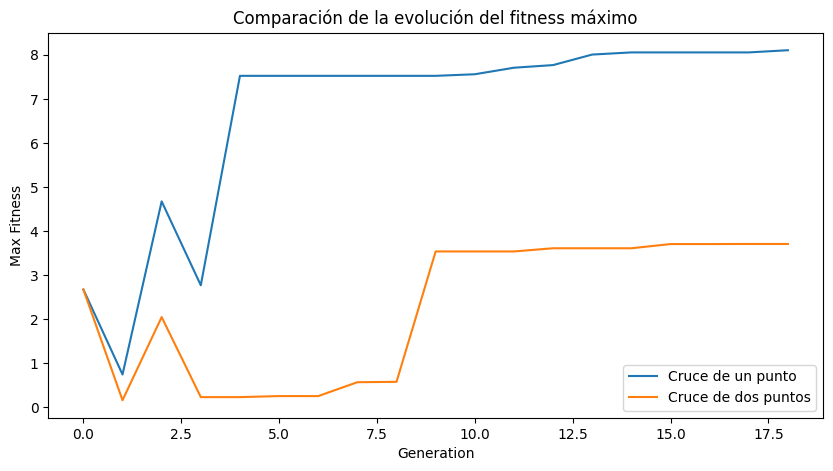

In [7]:
def compare_algorithms():
    # Ejecutamos el primer algoritmo (cruce de un punto)
    best1, log1 = main()

    # Ejecutamos el segundo algoritmo (cruce de dos puntos)
    best2, log2 = main45()

    # Comparamos los mejores fitness
    print("Mejor fitness con cruce de un punto: %f" % best1[0].fitness.values)
    print("Mejor fitness con cruce de dos puntos: %f" % best2[0].fitness.values)

    # Graficamos la evolución del fitness para ambos algoritmos
    plot_comparison(log1, log2)

def plot_comparison(log1, log2):
    gen1 = log1.select("gen")
    max1 = log1.select("max")
    gen2 = log2.select("gen")
    max2 = log2.select("max")

    plt.figure(figsize=(10, 5))
    plt.plot(gen1, max1, label="Cruce de un punto")
    plt.plot(gen2, max2, label="Cruce de dos puntos")
    plt.xlabel("Generation")
    plt.ylabel("Max Fitness")
    plt.title("Comparación de la evolución del fitness máximo")
    plt.legend()
    plt.show()

# Ejecuta la comparación
compare_algorithms()


**Cruce de un punto:** La línea azul muestra un ascenso rápido y sostenido en el valor de fitness máximo, alcanzando un pico prominente en la quinta generación y manteniendo un alto nivel de fitness a partir de ese punto. Este método parece favorecer una convergencia acelerada hacia soluciones de alta calidad, logrando un mejor fitness de 8.105325.

**Cruce de dos puntos:** Por otro lado, la línea naranja representa el cruce de dos puntos, cuyo incremento en el fitness máximo es más gradual y se estanca en un nivel considerablemente más bajo que cruce de un punto, con un mejor fitness de 3.709489. Este resultado indica una convergencia prematura hacia óptimos locales.

##**MEJOR ALGORITMO CRUCE DE DOS PUNTOS**

Para optimizar el rendimiento del algoritmo genético aplicando técnicas de cruce de dos puntos, se han ajustado los parámetros operativos de manera estratégica.

gen	nevals	avg     	std    	min       	max    
0  	12    	0.216819	0.74208	-0.0861001	2.67593
1  	8     	0.4986  	1.42578	-1        	4.38237
2  	10    	0.383589	1.29906	-1        	4.38237
3  	8     	0.628547	1.42282	-1        	3.74711
4  	9     	0.571677	1.48698	-1        	4.58391
5  	10    	0.0719505	0.45241	-1        	1.06889
6  	9     	0.62842  	1.88198	-1        	6.59451
7  	12    	0.630354 	1.88132	-1        	6.59451
8  	9     	0.593812 	1.8899 	-1        	6.59451
9  	9     	0.730887 	1.89991	-1        	6.59451
10 	7     	0.689562 	1.87089	-1        	6.53316
11 	8     	0.553027 	1.44284	-1        	4.87451
12 	10    	0.188796 	0.970171	-1.15557  	2.58638
13 	10    	0.214085 	1.45885 	-1        	4.87451
14 	7     	0.214085 	1.45885 	-1        	4.87451
15 	11    	0.214165 	1.45884 	-1        	4.87451
16 	10    	0.0586592	0.966154	-1        	2.98593
17 	10    	0.032576 	0.965085	-1        	2.98593
18 	7     	0.032576 	0.965085	-1        	2.98593
19 	8     	0.0325767	0.965085	-1       

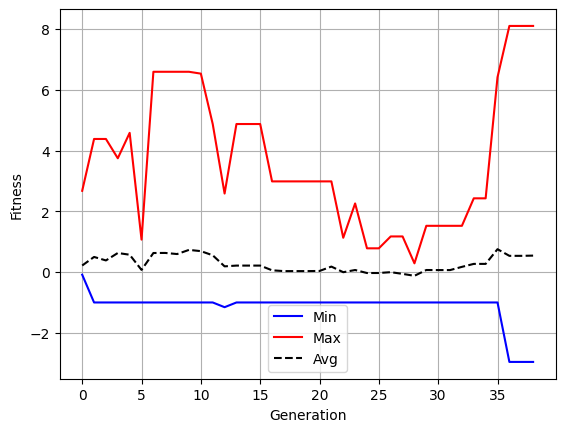

In [8]:
# Creamos los objetos para definir el problema y el tipo de individuo

creator.create("FitnessMax2", base.Fitness, weights=(1.0,))
creator.create("Individual2", list, fitness=creator.FitnessMax2)


def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    #ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main2():
    toolbox = base.Toolbox()

    # Generación de genes
    toolbox.register("attr_uniform", random.uniform, -5, 5)

    # Generación de inviduos y población
    toolbox.register("individual", tools.initRepeat, creator.Individual2,
                 toolbox.attr_uniform, 2)
    toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 12)

    # Registro de operaciones genéticas
    toolbox.register("evaluate", funcion_objetivo)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutGaussian, mu=0.2,
                 sigma= 0.3, indpb=0.25)
    toolbox.register("select", tools.selBest)
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.3, 0.6, 38
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

best, log = main2()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

Observamos en la gráfica que, alrededor de la generación 15, la aptitud máxima experimenta una estabilización en el valor de 3. A partir de este punto, el algoritmo requiere una serie de iteraciones adicionales para diferenciar y seleccionar de forma efectiva los individuos óptimos.

## **COMPARACIÓN CRUCE DE UN PUNTO VS CRUCE DE DOS PUNTOS**

gen	nevals	avg     	std    	min       	max    
0  	12    	0.216819	0.74208	-0.0861001	2.67593
1  	10    	0.00524512	0.277343	-0.597996 	0.747567
2  	10    	0.64715   	1.43132 	0.00361247	4.67568 
3  	12    	0.416174  	1.069   	-0.42366  	2.77214 
4  	12    	1.1056    	2.39237 	-2.78487  	7.52403 
5  	8     	3.1672    	2.09119 	0.420113  	7.52403 
6  	8     	4.65274   	1.63043 	2.77214   	7.52403 
7  	9     	5.04734   	1.83887 	0.509499  	7.52403 
8  	8     	4.4001    	2.37966 	0.308116  	7.52403 
9  	9     	5.74049   	1.618   	1.73391   	7.52403 
10 	11    	6.52871   	1.61733 	2.09751   	7.56013 
11 	7     	6.0053    	2.54831 	0.0775767 	7.70829 
12 	10    	5.90457   	2.24593 	1.46887   	7.76823 
13 	9     	6.92394   	1.92169 	0.907527  	8.00699 
14 	9     	7.29174   	1.56317 	2.16393   	8.0557  
15 	8     	7.43865   	1.55414 	2.3077    	8.0557  
16 	9     	5.52882   	2.45205 	1.18042   	8.0557  
17 	10    	6.30099   	1.76073 	3.13543   	8.0557  
18 	12    	5.42948   	2.75524 	0.150729

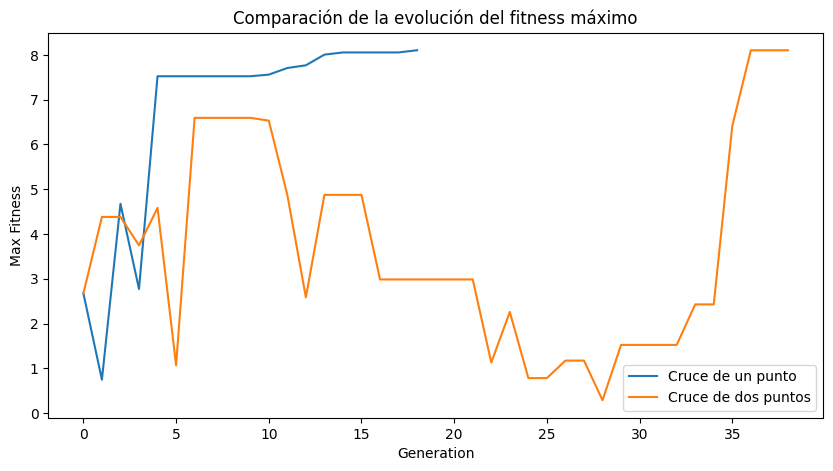

In [9]:
def compare_algorithms():
    # Ejecutamos el primer algoritmo (cruce de un punto)
    best1, log1 = main()

    # Ejecutamos el segundo algoritmo (cruce de dos puntos)
    best2, log2 = main2()

    # Comparamos los mejores fitness
    print("Mejor fitness con cruce de un punto: %f" % best1[0].fitness.values)
    print("Mejor fitness con cruce de dos puntos: %f" % best2[0].fitness.values)

    # Graficamos la evolución del fitness para ambos algoritmos
    plot_comparison(log1, log2)

def plot_comparison(log1, log2):
    gen1 = log1.select("gen")
    max1 = log1.select("max")
    gen2 = log2.select("gen")
    max2 = log2.select("max")

    plt.figure(figsize=(10, 5))
    plt.plot(gen1, max1, label="Cruce de un punto")
    plt.plot(gen2, max2, label="Cruce de dos puntos")
    plt.xlabel("Generation")
    plt.ylabel("Max Fitness")
    plt.title("Comparación de la evolución del fitness máximo")
    plt.legend()
    plt.show()

# Ejecuta la comparación
compare_algorithms()


El operador de cruce de dos puntos tarda más en identificar soluciones de alta calidad, requiriendo una mayor cantidad de generaciones para alcanzar niveles de fitness comparables. A pesar de esta lenta convergencia, el algoritmo que emplea el cruce de dos puntos finalmente logra un nivel de fitness máximo similar al del cruce de un punto, aunque no es hasta la generación 35 que se observa este resultado. Esto puede interpretarse como una inversión en precisión y fiabilidad, a cambio de un mayor costo computacional y temporal.

La capacidad del cruce de dos puntos para afinar la selección de individuos 'buenos' a lo largo de un mayor número de iteraciones puede ser particularmente beneficiosa en problemas donde la precisión y la exactitud son cruciales. Además, puede proporcionar una ventaja al explorar espacios de soluciones más complejos, donde la diversidad genética prolongada puede descubrir soluciones óptimas que de otro modo podrían pasarse por alto.

#**EJERCICIO 2**

**texto en negrita**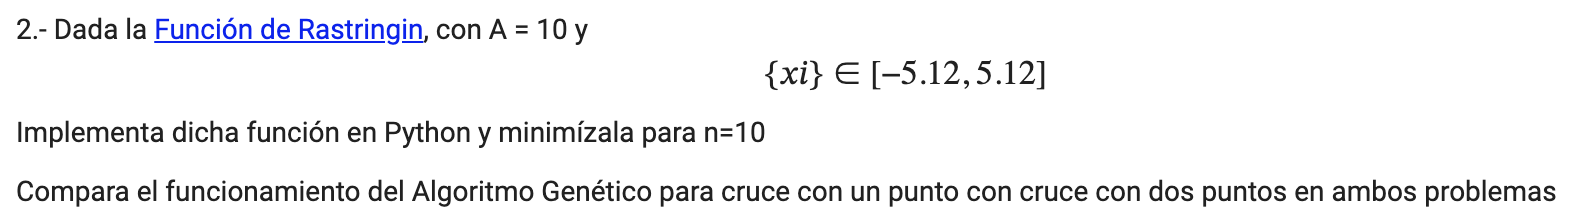

In [10]:
def rastrigin(x):
    x_array = np.array(x)
    return 10 * len(x) + np.sum(x_array**2 - 10 * np.cos(2 * np.pi*x_array))
    #return 10 * len(x[0]) + np.sum(x[0]**2 - 10 * np.cos(2 * np.pi*x[0]))

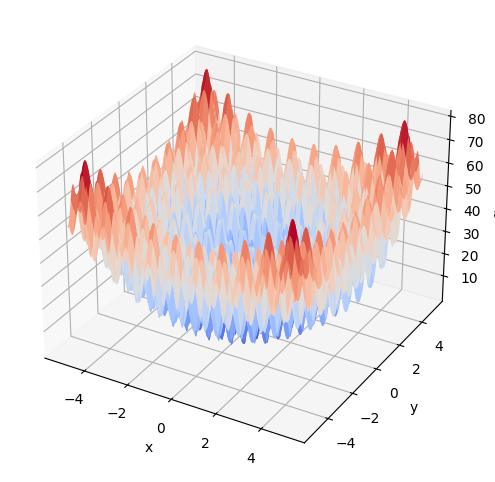

In [11]:
# Generamos vectores que barran todo el dominio
x = np.linspace(-5.12, 5.12, 1000)
y = np.linspace(-5.12, 5.12, 1000)
# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([rastrigin(val) for val in vals],(1000, 1000))
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.add_subplot(111, projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

plt.show()

La gráfica presenta una representación tridimensional de la función de Rastrigin. Esta función se distingue por la presencia de numerosos mínimos locales, como evidencia la complejidad de la superficie graficada. Sin embargo, únicamente cuenta con un mínimo global en f(0,0)=0, donde se alcanza el valor mínimo global. La función de Rastrigin se caracteriza por sus distintivos picos y valles, lo que la hace particularmente desafiante para algoritmos de optimización que buscan identificar el mínimo global en medio de múltiples mínimos locales.

In [12]:
def funcion_objetivo2(x):

    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 5.12 or x[i] < -5.12:
            return 100 # si no está en el rango penalizamos.

    res = rastrigin(x)

    return res,

## **CRUCE DE UN PUNTO**

gen	nevals	avg    	std   	min    	max    
0  	12    	34.1513	12.649	11.5529	51.5425
1  	10    	24.4533	11.0887	11.5529	54.2101
2  	10    	19.8891	11.709 	11.5529	50.1759
3  	9     	18.7797	11.2117	11.5529	48.1091
4  	12    	12.7093	4.56766	6.44429	26.8313
5  	8     	10.714 	4.15662	6.44429	21.9752
6  	8     	8.33061	2.72382	6.44429	13.7542
7  	10    	6.48651	0.356892	5.85449	7.54064
8  	9     	8.01157	5.70901 	1.79421	25.5426
9  	10    	7.21278	4.42125 	1.79421	20.0941
10 	12    	7.47927	4.92541 	1.79421	18.4405
11 	7     	7.34425	4.26055 	1.79421	15.5598
12 	11    	6.98936	3.92055 	1.79421	13.4534
13 	8     	5.04223	4.89062 	1.79421	13.8254
14 	11    	3.13812	2.18612 	1.79421	7.87054
15 	8     	6.14864	6.62745 	1.79421	20.0022
16 	9     	8.94658	9.43312 	1.79421	32.3048
17 	8     	5.08045	5.52478 	1.79421	16.6827
18 	11    	5.73727	7.12375 	1.79421	22.5624
19 	10    	3.71555	6.3157  	1.79421	24.6616
20 	11    	3.67925	5.44681 	1.79421	21.5546
21 	11    	4.86117	5.34919 	1.79421	15.825

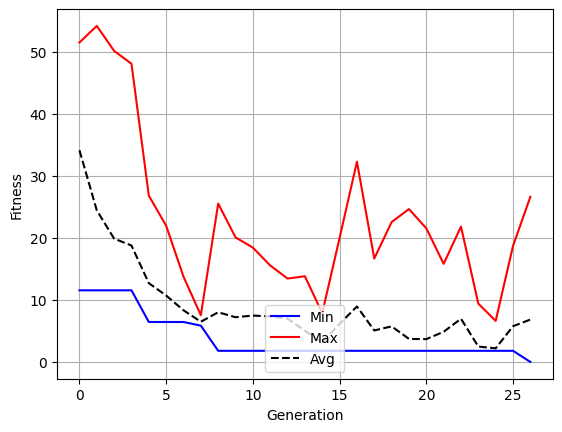

In [13]:
creator.create("FitnessMin1", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin1)




def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    #ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main1():
  toolbox = base.Toolbox()

    # Generación de genes
  toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)

    # Generación de inviduos y población
  toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
  toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 12)

    # Registro de operaciones genéticas
  toolbox.register("evaluate", funcion_objetivo2)
  toolbox.register("mate", tools.cxOnePoint)
  toolbox.register("mutate", tools.mutGaussian, mu=0.5,
                 sigma= 0.5, indpb=0.25)
  toolbox.register("select", tools.selTournament, tournsize=3)
  random.seed(42)
  CXPB, MUTPB, NGEN = 0.5, 0.6, 26
  pop = toolbox.population()
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  stats.register("avg", np.mean)
  stats.register("std", np.std)
  stats.register("min", np.min)
  stats.register("max", np.max)
  logbook = tools.Logbook()
  pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
  return hof, logbook

best, log = main1()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)


La convergencia del algoritmo evolutivo se refleja en el gráfico, donde la línea de mínimo converge hacia 0 y la línea promedio mantiene esta convergencia constante. Esta consistencia sugiere que el algoritmo ha alcanzado una solución óptima, ya que a lo largo de las iteraciones mantiene un fitness constante, siendo este el mejor obtenido.

En cuanto a la línea máxima, fluctúa entre 10 y 30 elementos con un promedio de 20 a lo largo de las iteraciones. Sin embargo, se considera más confiable centrarse en las líneas de mínimo y promedio, ya que convergen hacia el mismo punto, proporcionando resultados más significativos y consistentes.

Destacamos que estos resultados pueden variar según los parámetros utilizados, como la probabilidad de cruce (CXPB), la probabilidad de mutación (MUTPB) y el número de generaciones (NGEN). Modificar estos valores durante la práctica puede influir en la modificación de los resultados obtenidos.

##**CRUCE DOS PUNTOS MISMOS PARÁMETROS CRUCE DE UN PUNTO**


gen	nevals	avg    	std   	min    	max    
0  	12    	34.1513	12.649	11.5529	51.5425
1  	8     	23.8886	10.7374	11.5529	41.2397
2  	8     	17.7359	7.03101	11.5529	31.0512
3  	12    	16.0678	6.63112	11.5529	31.3983
4  	9     	11.4816	2.40529	4.57062	15.6074
5  	7     	12.1737	6.07371	4.57062	30.0226
6  	10    	10.9689	9.38205	4.57062	31.2115
7  	7     	8.60491	6.29715	4.57062	21.9741
8  	11    	6.49046	5.44826	1.834  	22.8751
9  	11    	6.14886	4.81422	1.834  	18.3266
10 	12    	6.25361	5.61178	1.834  	20.5784
11 	10    	4.95571	5.97249	1.73996	20.0149
12 	11    	3.3919 	5.26002	1.71408	20.8368
13 	9     	5.63825	6.1418 	1.73996	19.5358
14 	7     	2.73301	2.58203	1.73996	10.9634
15 	9     	6.618  	8.45418	1.73996	21.9069
16 	9     	5.10678	7.58274	1.5859 	23.3573
17 	8     	1.98905	1.03442	1.58578	5.39796
18 	11    	4.48834	3.97744	1.58578	11.4834
19 	11    	1.96723	1.00896	1.58578	5.19473
20 	7     	4.19504	5.26281	1.58578	17.304 
21 	9     	6.92616	7.66327	1.58578	20.0859
22 	10    	6.

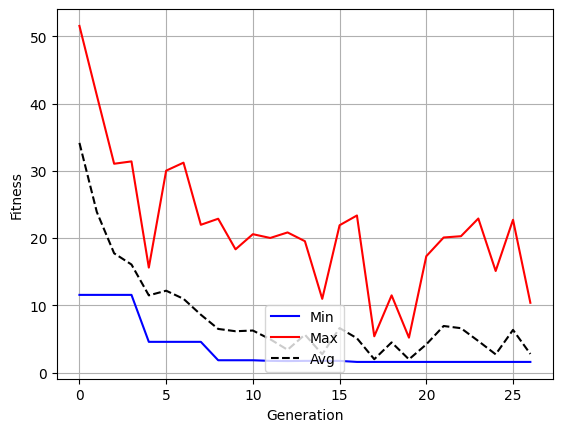

In [14]:
creator.create("FitnessMin3", base.Fitness, weights=(-1.0,))
creator.create("Individual8", list, fitness=creator.FitnessMin3)



def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    #ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main500():
  toolbox = base.Toolbox()

    # Generación de genes
  toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)

    # Generación de inviduos y población
  toolbox.register("individual", tools.initRepeat, creator.Individual8,
                 toolbox.attr_uniform, 2)
  toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 12)

    # Registro de operaciones genéticas
  toolbox.register("evaluate", funcion_objetivo2)
  toolbox.register("mate", tools.cxTwoPoint)
  toolbox.register("mutate", tools.mutGaussian, mu=0.5,
                 sigma= 0.5, indpb=0.25)
  toolbox.register("select", tools.selTournament, tournsize=3)
  random.seed(42)
  CXPB, MUTPB, NGEN = 0.5, 0.6, 26
  pop = toolbox.population()
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  stats.register("avg", np.mean)
  stats.register("std", np.std)
  stats.register("min", np.min)
  stats.register("max", np.max)
  logbook = tools.Logbook()
  pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
  return hof, logbook

best, log = main500()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

La implementación del cruce de dos puntos, aunque ha optimizado el rendimiento de la aptitud máxima hasta cierto grado, no ha logrado llevar al algoritmo a superar los mínimos esperados. Este hecho podría indicar que, aunque hay una mejora en la identificación de soluciones potencialmente buenas, el proceso evolutivo no está avanzando de manera eficaz hacia la optimización completa del problema. Procedemos en el siguiente apartado a tratar de mejorar este algortimo.

##**COMPARACIÓN DE CRUCE UN PUNTO VS CRUCE DOS PUNTOS CON LOS MISMOS PARÁMETROS**

gen	nevals	avg    	std   	min    	max    
0  	12    	34.1513	12.649	11.5529	51.5425
1  	10    	24.4533	11.0887	11.5529	54.2101
2  	10    	19.8891	11.709 	11.5529	50.1759
3  	9     	18.7797	11.2117	11.5529	48.1091
4  	12    	12.7093	4.56766	6.44429	26.8313
5  	8     	10.714 	4.15662	6.44429	21.9752
6  	8     	8.33061	2.72382	6.44429	13.7542
7  	10    	6.48651	0.356892	5.85449	7.54064
8  	9     	8.01157	5.70901 	1.79421	25.5426
9  	10    	7.21278	4.42125 	1.79421	20.0941
10 	12    	7.47927	4.92541 	1.79421	18.4405
11 	7     	7.34425	4.26055 	1.79421	15.5598
12 	11    	6.98936	3.92055 	1.79421	13.4534
13 	8     	5.04223	4.89062 	1.79421	13.8254
14 	11    	3.13812	2.18612 	1.79421	7.87054
15 	8     	6.14864	6.62745 	1.79421	20.0022
16 	9     	8.94658	9.43312 	1.79421	32.3048
17 	8     	5.08045	5.52478 	1.79421	16.6827
18 	11    	5.73727	7.12375 	1.79421	22.5624
19 	10    	3.71555	6.3157  	1.79421	24.6616
20 	11    	3.67925	5.44681 	1.79421	21.5546
21 	11    	4.86117	5.34919 	1.79421	15.825

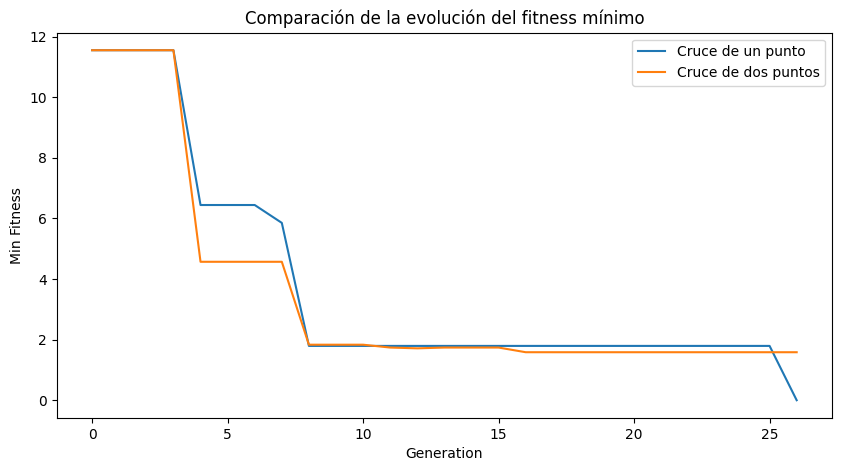

In [15]:
def compare_algorithms():
    # Ejecutamos el primer algoritmo (cruce de un punto)
    best1, log1 = main1()

    # Ejecutamos el segundo algoritmo (cruce de dos puntos)
    best2, log2 = main500()

    # Comparamos los mejores fitness
    print("Mejor fitness con cruce de un punto: %f" % best1[0].fitness.values[0])
    print("Mejor fitness con cruce de dos puntos: %f" % best2[0].fitness.values[0])

    # Graficamos la evolución del fitness para ambos algoritmos
    plot_comparison(log1, log2)

def plot_comparison(log1, log2):
    gen1 = log1.select("gen")
    fit_mins1 = log1.select("min")
    gen2 = log2.select("gen")
    fit_mins2 = log2.select("min")

    plt.figure(figsize=(10, 5))
    plt.plot(gen1, fit_mins1, label="Cruce de un punto")
    plt.plot(gen2, fit_mins2, label="Cruce de dos puntos")
    plt.xlabel("Generation")
    plt.ylabel("Min Fitness")
    plt.title("Comparación de la evolución del fitness mínimo")
    plt.legend()
    plt.show()

# Ejecuta la comparación
compare_algorithms()


La implementación del cruce de dos puntos no ha logrado igualar ni superar el desempeño del cruce de un punto bajo el mismo conjunto de parámetros. Esto puede indicar que los parámetros optimizados para el cruce de un punto no son transferibles de manera efectiva para el operador de cruce de dos puntos en esta tarea de minimización.

## **MEJOR ALGORITMO CRUCE DOS PUNTOS**

gen	nevals	avg   	std    	min    	max    
0  	16    	35.955	12.0376	11.5529	53.5077
1  	10    	24.6145	10.3516	11.5529	38.7831
2  	12    	19.7546	9.268  	11.5529	43.1853
3  	10    	13.868 	2.94584	11.5529	22.0817
4  	13    	16.1401	6.7483 	11.5529	32.9224
5  	12    	12.8009	5.34689	4.31121	30.6513
6  	11    	11.2802	6.73192	4.31121	26.4157
7  	9     	8.37232	5.93751	4.31121	22.638 
8  	12    	7.91253	8.9019 	4.31121	38.7345
9  	11    	7.27714	5.99232	4.31121	22.3615
10 	14    	11.1932	8.15952	4.31121	23.9304
11 	11    	6.45235	4.37308	4.23801	19.222 
12 	13    	5.81276	4.51938	4.23801	22.4057
13 	9     	6.49889	4.72524	4.23801	19.4933
14 	12    	5.51047	3.91752	3.40633	20.3135
15 	10    	7.65968	6.21093	3.40633	24.0225
16 	11    	6.09761	3.6348 	2.20601	14.8696
17 	13    	6.97802	5.1152 	2.20601	19.7274
18 	10    	5.39856	5.26088	2.20601	23.8779
19 	11    	4.25013	4.72284	1.86653	21.7535
20 	12    	4.52515	4.57007	1.86653	20.777 
21 	15    	7.30854	9.89901	1.42837	40.5806
22 	11    	5.

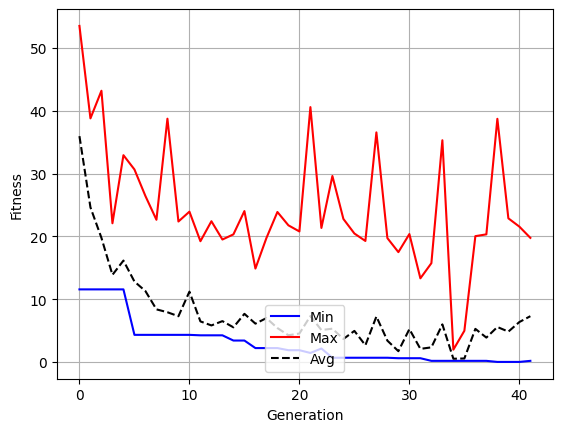

In [16]:
creator.create("FitnessMin2", base.Fitness, weights=(-1.0,))
creator.create("Individual4", list, fitness=creator.FitnessMin2)


def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    #ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main2():
  toolbox = base.Toolbox()

    # Generación de genes
  toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)

    # Generación de inviduos y población
  toolbox.register("individual", tools.initRepeat, creator.Individual4,
                 toolbox.attr_uniform, 2)
  toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 16)

    # Registro de operaciones genéticas
  toolbox.register("evaluate", funcion_objetivo2)
  toolbox.register("mate", tools.cxTwoPoint)
  toolbox.register("mutate", tools.mutGaussian, mu=0.5,
                 sigma= 0.5, indpb=0.25)
  toolbox.register("select", tools.selTournament, tournsize=3)
  random.seed(42)
  CXPB, MUTPB, NGEN = 0.4, 0.6, 41
  pop = toolbox.population()
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  stats.register("avg", np.mean)
  stats.register("std", np.std)
  stats.register("min", np.min)
  stats.register("max", np.max)
  logbook = tools.Logbook()
  pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
  return hof, logbook

best, log = main2()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

Como hemos discutido a lo largo de la actividad, la convergencia del cruce de dos puntos demuestra ser considerablemente más efectiva en comparación con el cruce de un punto. Esto se refleja en la convergencia de la función mínima hacia 0 y la aproximación significativa de la función promedio a este valor. A diferencia, la función máxima exhibe fluctuaciones, oscilando entre alrededor de 20 individuos, pero hacia la 30ª iteración se aproxima a 0. Resulta claro que con más iteraciones, la función máxima mostrará resultados similares a las otras dos funciones, consolidando así la eficacia del cruce de dos puntos en el proceso evolutivo.

## **COMPARACIÓN CRUCE DE UN PUNTO VS CRUCE DE DOS PUNTOS**

gen	nevals	avg    	std   	min    	max    
0  	12    	34.1513	12.649	11.5529	51.5425
1  	10    	24.4533	11.0887	11.5529	54.2101
2  	10    	19.8891	11.709 	11.5529	50.1759
3  	9     	18.7797	11.2117	11.5529	48.1091
4  	12    	12.7093	4.56766	6.44429	26.8313
5  	8     	10.714 	4.15662	6.44429	21.9752
6  	8     	8.33061	2.72382	6.44429	13.7542
7  	10    	6.48651	0.356892	5.85449	7.54064
8  	9     	8.01157	5.70901 	1.79421	25.5426
9  	10    	7.21278	4.42125 	1.79421	20.0941
10 	12    	7.47927	4.92541 	1.79421	18.4405
11 	7     	7.34425	4.26055 	1.79421	15.5598
12 	11    	6.98936	3.92055 	1.79421	13.4534
13 	8     	5.04223	4.89062 	1.79421	13.8254
14 	11    	3.13812	2.18612 	1.79421	7.87054
15 	8     	6.14864	6.62745 	1.79421	20.0022
16 	9     	8.94658	9.43312 	1.79421	32.3048
17 	8     	5.08045	5.52478 	1.79421	16.6827
18 	11    	5.73727	7.12375 	1.79421	22.5624
19 	10    	3.71555	6.3157  	1.79421	24.6616
20 	11    	3.67925	5.44681 	1.79421	21.5546
21 	11    	4.86117	5.34919 	1.79421	15.825

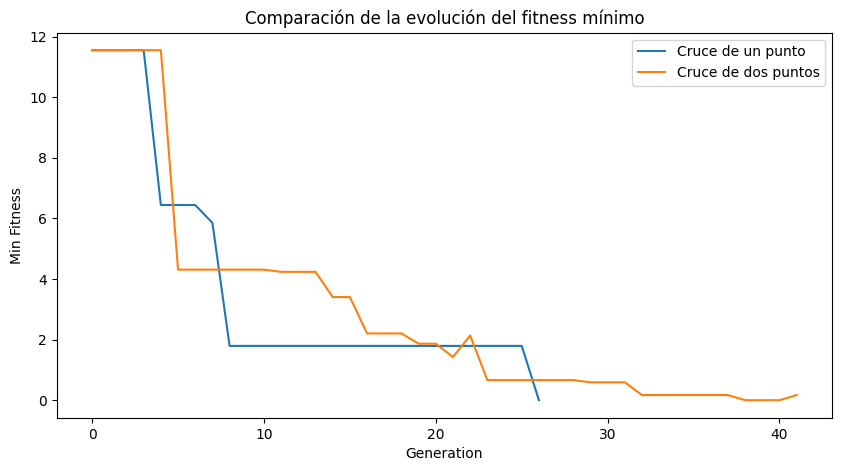

In [17]:
def compare_algorithms():
    # Ejecutamos el primer algoritmo (cruce de un punto)
    best1, log1 = main1()

    # Ejecutamos el segundo algoritmo (cruce de dos puntos)
    best2, log2 = main2()

    # Comparamos los mejores fitness
    print("Mejor fitness con cruce de un punto: %f" % best1[0].fitness.values[0])
    print("Mejor fitness con cruce de dos puntos: %f" % best2[0].fitness.values[0])

    # Graficamos la evolución del fitness para ambos algoritmos
    plot_comparison(log1, log2)

def plot_comparison(log1, log2):
    gen1 = log1.select("gen")
    fit_mins1 = log1.select("min")
    gen2 = log2.select("gen")
    fit_mins2 = log2.select("min")

    plt.figure(figsize=(10, 5))
    plt.plot(gen1, fit_mins1, label="Cruce de un punto")
    plt.plot(gen2, fit_mins2, label="Cruce de dos puntos")
    plt.xlabel("Generation")
    plt.ylabel("Min Fitness")
    plt.title("Comparación de la evolución del fitness mínimo")
    plt.legend()
    plt.show()

# Ejecuta la comparación
compare_algorithms()



En la gráfica más reciente, las conclusiones que hemos planteado a lo largo del ejercicio se visualizan de manera clara. Ambos tipos de cruces revelan que el algoritmo genético converge hacia 0. La diferencia radica en el número de generaciones necesarias para alcanzar este valor; mientras que el algoritmo de un punto requirió únicamente 25 generaciones, el algoritmo de dos puntos necesitó más. Sin embargo, es crucial destacar que el cruce de dos puntos se muestra más eficiente, proporcionando resultados más seguros y realistas. Esto se debe a que realiza más iteraciones, permitiendo que los valores se autocomprueben y autoevalúen en múltiples ocasiones. En consecuencia, demuestra ser más eficaz al seleccionar e identificar individuos generacionales de manera más precisa.